#Exercise 1

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

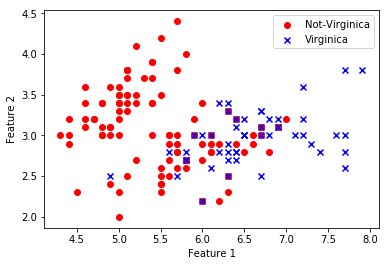

In [3]:
iris = datasets.load_iris()
X=iris.data[:,:2] #we only take the first two features. 150 observations
y=(iris["target"]==2).astype(np.int) #1 if Iris-Virginica, else 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.scatter(X[:100,0], X[:100,1], color="red", marker='o', label='Not-Virginica')
plt.scatter(X[100:150,0], X[100:150,1], color="blue", marker='x', label='Virginica')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc='upper right')
plt.show()

## 1.1 

In [0]:
def calculateAccuracy(yTrue, yPredict):
    size = len(yTrue)
    matches = 0
    for i in range(size):
        if (yTrue[i] == yPredict[i]):
            matches += 1
    return matches/size

In [0]:
def plot_error(errorAverage, errorLabel):
    chartX = np.arange(100)
    plt.figure()
    plt.plot(chartX,errorAverage[:100], label=errorLabel)
    plt.grid()

### Linear Unit with quadratic error as loss function

[[ 0.43318311  0.11779719 -2.54060047]]
[[ 0.12461986  0.51828522  0.59694268  0.67179958  1.00238776  0.27015507
   1.10498269  0.23861648  0.08092352  1.12474156  0.28991394  0.11246211
   0.03760521  0.11626267 -0.13909057  0.5065055  -0.06081113 -0.02129338
   0.05736408  0.20327732  0.0691438   0.28193479  1.24253875 -0.17100719
   0.48674662  0.2230362   0.33665479  0.41188972  0.28991394  0.31765197
   0.15197986  0.54564522  0.11284014  0.25799732 -0.10375141  0.54982381
   0.01404577  0.00226605  0.12461986  0.71511789 -0.05283198  0.30169366
   0.02582549  0.03760521  0.39213085 -0.03687367  0.82531395  0.37655057
   0.40808916  1.148301    0.13639958 -0.29298297 -0.32452156  0.31765197
   0.95526888 -0.18278691  0.08092352 -0.28120325  0.48294606  0.58896353
  -0.14744775  0.75843621  0.57718381 -0.12768888  0.44342831  0.60492184
   0.4749669   0.86863226  0.6087224   0.11626267  0.81353423  0.36857141
   0.62848127  0.23481591  0.03000408  0.45520803 -0.32034297  0.6600198

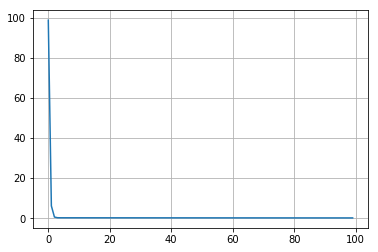

In [6]:
#### Activation function ####
def linear(w,X):
    return w@X

#### Classification ####
def classify(w,X):
    yPredicted = []
    print(linear(w,X))
    print("\n")
    for i in range(0,X.shape[1]):
        x = X[:,i]
        lin = linear(w,x)
        if (lin > 0):
            yPredicted.append(1)
        else:
            yPredicted.append(0)
    return yPredicted

#### Training ####
errAvg = []
Xb = np.c_[X_train,np.ones(X_train.shape[0])].T
w = [-10,-10,-10]
for i in range(0,10000):
    d = np.zeros((1,3))
    err = 0
    for j in range(0,X_train.shape[0]):    
        x = Xb[:,j]
        target = y_train[j]
        lin = linear(w,x)
        err += (target - lin)
        d = d + 2*(target - lin) * x
    errAvg.append(abs(err/X_train.shape[0]))
    w = w + 0.0001 * d
print(w)

#### Results ####
plot_error(errAvg, "Error")
yPred = classify(w,Xb)
print("Training accuracy:")
print(str(calculateAccuracy(y_train,yPred)*100) + "%")
print("\n")
XTestB = np.c_[X_test,np.ones(X_test.shape[0])].T
yTestPred = classify(w,XTestB)
print("Test accuracy:")
print(str(calculateAccuracy(y_test, yTestPred)*100) + "%")
print("\n")

### Sigmoid unit with quadratic error as loss function

[[ 0.85730855 -1.4771219  -1.13968171]]
[[0.5076051  0.53131417 0.44226248 0.52178345 0.42930213 0.36896105
  0.72000725 0.31645325 0.12594095 0.79012065 0.46119786 0.15395767
  0.11680237 0.08467403 0.54800597 0.56786189 0.11437459 0.2167844
  0.16220528 0.41897489 0.143119   0.3352825  0.46220495 0.12754382
  0.47302067 0.51353975 0.06733307 0.39479607 0.46119786 0.68015874
  0.28058105 0.30015011 0.54441634 0.09355414 0.43769568 0.58876538
  0.15088954 0.17080553 0.5076051  0.54312257 0.17976393 0.42476723
  0.1329235  0.11680237 0.30824192 0.38693533 0.51223685 0.50398503
  0.56202475 0.73696017 0.47071121 0.16094986 0.13185904 0.68015874
  0.57594518 0.14490425 0.12594095 0.14198626 0.63843023 0.31846125
  0.09812119 0.56430458 0.35134322 0.13739207 0.4517127  0.57368025
  0.50992119 0.5336212  0.40619996 0.08467403 0.54900948 0.37450762
  0.50036454 0.47663205 0.3385178  0.41545359 0.33644577 0.55845675
  0.43413459 0.11291581 0.31645325 0.69741474 0.43285389 0.09684704
  0.38131

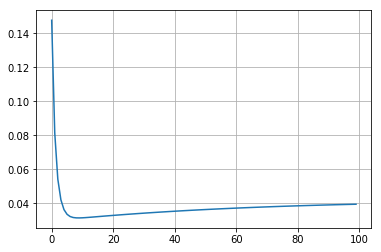

In [7]:
#### Activation function ####
def sigmoid(w, X):
    return (1/(1+np.exp(-w@X)))

#### Classification ####
def classify(w,X):
    yPredicted = []
    print(sigmoid(w,X))
    print("\n")
    for i in range(0,X.shape[1]):
        x = X[:,i]
        sig = sigmoid(w,x)
        if (sig >= 0.5):
            yPredicted.append(1)
        else:
            yPredicted.append(0)
    return yPredicted

#### Training ####
errAvg = []
Xb = np.c_[X_train,np.ones(X_train.shape[0])].T
w = np.zeros((1,3))
for i in range(0,1000):
    d = np.zeros((1,3))
    err = 0
    for j in range(0,X_train.shape[0]):    
        x = Xb[:,j]
        target = y_train[j]
        sig = sigmoid(w,x)
        err += (target-sig)
        d = d + 2 * (target-sig) * sig * (1-sig) * x
    errAvg.append(abs(err/X_train.shape[0])[0])
    w = w + 0.001 * d

#### Results ####
plot_error(errAvg, "Error")
print(w)
yPred = classify(w,Xb)
print("Training accuracy:")
print(str(calculateAccuracy(y_train,yPred)*100) + "%")
print("\n")
XTestB = np.c_[X_test,np.ones(X_test.shape[0])].T
yTestPred = classify(w,XTestB)
print("Test accuracy:")
print(str(calculateAccuracy(y_test, yTestPred)*100) + "%")
print("\n")



### Sigmoid unit with cross entropy as loss function

[[ 1.24997949 -1.9832632  -2.12717771]]
[[0.49696948 0.54848618 0.43157577 0.54311697 0.43362583 0.32000302
  0.80578901 0.25405858 0.06334592 0.87484868 0.44223228 0.08545949
  0.05632191 0.03596149 0.53896914 0.59697639 0.05363781 0.1385877
  0.0913675  0.3817556  0.07618289 0.27846586 0.49031726 0.06158845
  0.46785237 0.50988555 0.0270671  0.35960237 0.44223228 0.73292624
  0.2096431  0.24593714 0.54641699 0.04261436 0.39203037 0.62665199
  0.08150674 0.09764033 0.49696948 0.57392791 0.1042944  0.39402279
  0.06783857 0.05632191 0.24997587 0.32950155 0.53773772 0.50447202
  0.58448511 0.82460657 0.44758119 0.08480899 0.06285217 0.73292624
  0.62860394 0.07409744 0.06334592 0.07062963 0.68773149 0.26984644
  0.04227491 0.60417536 0.31065144 0.06922108 0.43689675 0.60934314
  0.51738253 0.5686233  0.38372876 0.03596149 0.58651205 0.33134938
  0.51197255 0.46038845 0.27247628 0.38886339 0.25658864 0.59175462
  0.39920593 0.05518175 0.25405858 0.77664298 0.42627055 0.04350681
  0.31818

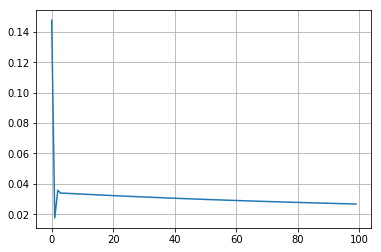

In [8]:
#### Activation function ####
def sigmoid(w, X):
    return (1/(1+np.exp(-w@X)))

#### Classification ####
def classify(w,X):
    yPredicted = []
    print(sigmoid(w,X))
    for i in range(0,X.shape[1]):
        x = X[:,i]
        sig = sigmoid(w,x)
        if (sig >= 0.5):
            yPredicted.append(1)
        else:
            yPredicted.append(0)
    return yPredicted

#### Training ####
Xb = np.c_[X_train,np.ones(X_train.shape[0])].T
w = np.zeros((1,3))
errAvg = []
for i in range(0,1000):
    d = np.zeros((1,3))
    err = 0
    for j in range(0,X_train.shape[0]):
        x = Xb[:,j]
        target = y_train[j]
        sig = sigmoid(w,x)
        err += (target-sig)
        d = d + (target-sig)*x
    errAvg.append(abs(err/X_train.shape[0])[0])
    w = w + 0.001 * d

#### Results ####
print(w)
plot_error(errAvg, "Error")
yPred = classify(w,Xb)
print("Training accuracy:")
print(str(calculateAccuracy(y_train,yPred)*100) + "%")
print("\n")
XTestB = np.c_[X_test,np.ones(X_test.shape[0])].T
yTestPred = classify(w,XTestB)
print("Test accuracy:")
print(str(calculateAccuracy(y_test, yTestPred)*100) + "%")
print("\n")

# Exercise 2



In [0]:
import keras as krs
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.utils import plot_model
from keras.utils import to_categorical
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib.font_manager import FontProperties

Using TensorFlow backend.


In [0]:
#1 hidden layer, sigmoid
def preproccessData(dataset):
    dataset = dataset.apply(lambda x: x.astype('category').cat.codes)
    return dataset

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data')
data.columns = ["Class", "age", "menopause", "tumor-size", "inv-nodes", "node-caps", "deg-malig", "breast", "breast-quad", "irradiat"]
y = (data["Class"]=="recurrence-events").astype(np.int).values
X = preproccessData(data.iloc[:,1:]).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)

    

(199, 9)


199/199 [==============================] - 2s 11ms/step
sigmoid mean_squared_error

Train score: 
0.1986122513236712


199/199 [==============================] - 2s 12ms/step
sigmoid binary_crossentropy

Train score: 
0.5715730647046362


199/199 [==============================] - 2s 11ms/step
sigmoid mean_squared_error

Train score: 
0.22128027303134976


199/199 [==============================] - 2s 11ms/step
sigmoid binary_crossentropy

Train score: 
0.6114132700853012




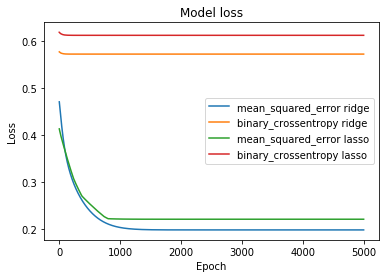

In [0]:
for act in ['sigmoid']:
    for regularizer in [krs.regularizers.l2(0.05), krs.regularizers.l1(0.05)]:
        model = Sequential()
        model.add(Dense(units=1, activation=act, kernel_regularizer=regularizer, use_bias=False))
        for losses in ["mean_squared_error", "binary_crossentropy"]:
            model.compile(loss=losses,optimizer='adam')
            history = model.fit(X_train, y_train, verbose=0, epochs=5000, batch_size=X_train.shape[0])
            y_pred = model.predict(X_train)
            plt.plot(history.history['loss'],label= losses + " " + ("lasso" if regularizer.l1 > 0 else "ridge"))
            scoretrain = model.evaluate(X_train, y_train)
            print(act + " " + losses + "\n")
            print("Train score: ")
            print(scoretrain)
            print("\n")
            
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.show()  

199/199 [==============================] - 2s 12ms/step
relu mean_squared_error

Train score: 
0.17422306672412546


199/199 [==============================] - 2s 13ms/step
relu binary_crossentropy

Train score: 
0.5245269015805805


199/199 [==============================] - 2s 13ms/step
relu mean_squared_error

Train score: 
0.18605214522112554


199/199 [==============================] - 3s 13ms/step
relu binary_crossentropy

Train score: 
0.53594426294068




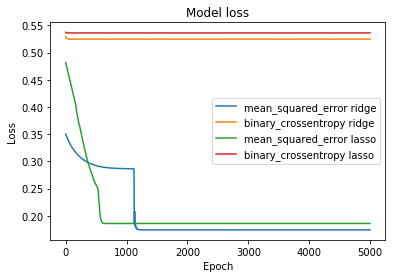

In [0]:
for act in ['relu']:
    for regularizer in [krs.regularizers.l2(0.05), krs.regularizers.l1(0.05)]:
        model = Sequential()
        model.add(Dense(units=1, activation=act, kernel_regularizer=regularizer, use_bias=False))
        for losses in ["mean_squared_error", "binary_crossentropy"]:
            model.compile(loss=losses,optimizer='adam')
            history = model.fit(X_train, y_train, verbose=0, epochs=5000, batch_size=X_train.shape[0])
            y_pred = model.predict(X_train)
            plt.plot(history.history['loss'],label=losses + " " + ("lasso" if regularizer.l1 > 0 else "ridge"))
            #plt.plot(history.history['acc'])
            scoretrain = model.evaluate(X_train, y_train)
            print(act + " " + losses + "\n")
            print("Train score: ")
            print(scoretrain)
            print("\n")
            
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.show()  

199/199 [==============================] - 3s 16ms/step
LeakyReLU mean_squared_error

Train score: 
0.17422305953562559


199/199 [==============================] - 3s 16ms/step
LeakyReLU binary_crossentropy

Train score: 
0.5245269204503927


199/199 [==============================] - 3s 16ms/step
LeakyReLU mean_squared_error

Train score: 
0.1860645265884735


199/199 [==============================] - 3s 16ms/step
LeakyReLU binary_crossentropy

Train score: 
0.535934495117197




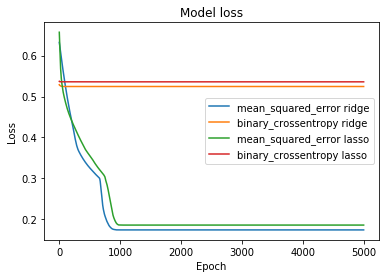

In [0]:
for regularizer in [krs.regularizers.l2(0.05), krs.regularizers.l1(0.05)]:
        model = Sequential()
        model.add(Dense(units=1, kernel_regularizer=regularizer, use_bias=False))
        model.add(krs.layers.LeakyReLU(alpha=0.05))
        for losses in ["mean_squared_error", "binary_crossentropy"]:
            model.compile(loss=losses,optimizer='adam')
            history = model.fit(X_train, y_train, verbose=0, epochs=5000, batch_size=X_train.shape[0])
            y_pred = model.predict(X_train)
            plt.plot(history.history['loss'],label=losses + " " + ("lasso" if regularizer.l1 > 0 else "ridge"))
            scoretrain = model.evaluate(X_train, y_train)
            print("LeakyReLU " + losses + "\n")
            print("Train score: ")
            print(scoretrain)
            print("\n")

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.show()  

86/86 [==============================] - 0s 60us/step
['loss', 'acc']
Train score: 
[0.1743635647560484, 0.7437185935638658]


Test score: 
[0.1959501951932907, 0.7325581339902656]




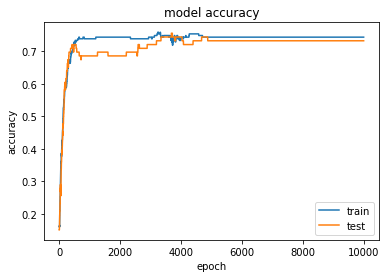

In [0]:
model = Sequential()
model.add(Dense(units=1, activation='relu', kernel_regularizer=regularizer, use_bias=False))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10000, batch_size=X_train.shape[0], verbose=0)
scoretrain = model.evaluate(X_train, y_train)
scoretest = model.evaluate(X_test, y_test)
print(model.metrics_names)
print("Train score: ")
print(scoretrain)
print("\n")
print("Test score: ")
print(scoretest)
print("\n")
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()